In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

strategy = tf.distribute.MirroredStrategy()
print("Number of Accelerator: ",strategy.num_replicas_in_sync)

with strategy.scope():
  print("Ready To Go !")

Number of Accelerator:  1
Ready To Go !


In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
import tensorflow as tf
import os,sys
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

In [ ]:
preTrained_model = tf.keras.models.load_model("Pretrained_Generator_Model.h5", compile=False)
print(preTrained_model.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 64  1088        ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_16 (LeakyReLU)     (None, 128, 128, 64  0           ['conv2d_19[0][0]']              
                                )                                                           

In [1]:
def load_data():
    data = np.load("rgb_bw_256_256_god.npz")
    rgb, bw = data['a'], data['b']
    rgb, bw = np.array(rgb), np.array(bw)
    rgb, bw = rgb.astype('float32'), bw.astype('float32')
    rgb = rgb.reshape((rgb.shape[0], rgb.shape[1], rgb.shape[2], 3))
    bw = bw.reshape((bw.shape[0], bw.shape[1], bw.shape[2], 1))
    # scale from [0,255] to [-1,1]
    rgb = (rgb - 127.5) / 127.5
    bw = (bw - 127.5) / 127.5
    return rgb, bw

In [ ]:
def show_prediction(bw_images, rgb_images, predicted_rgb, no_of_samples):

    plt.rcParams["figure.figsize"] = (10,10)
    for i in range(no_of_samples):

        plt.subplot(331)
        plt.imshow(bw_images[i], cmap='gray')
        plt.title("B&W Image")
        plt.axis('off')

        plt.subplot(332)
        plt.imshow(rgb_images[i])
        plt.title("RGB Image(Ground Truth)")
        plt.axis('off')

        plt.subplot(333)
        plt.imshow(predicted_rgb[i])
        plt.title("RGB Image(Prediction)")
        plt.axis('off')

        plt.show()

In [ ]:
def predictionFunction(generator, no_of_samples = 1):
    rgb_images, bw_images = load_data()
    bw_images = np.array(bw_images[:no_of_samples])
    rgb_images = np.array(rgb_images[:no_of_samples])
    predicted_rgb  = generator.predict(bw_images,verbose=0)
    # scale from [-1,1] to [0,1]
    # X = (X + 1) / 2.0
    bw_images = (bw_images + 1.0) / 2.0
    rgb_images = (rgb_images + 1.0) / 2.0
    predicted_rgb = (predicted_rgb + 1.0) / 2.0
    show_prediction(bw_images, rgb_images, predicted_rgb, no_of_samples = no_of_samples)

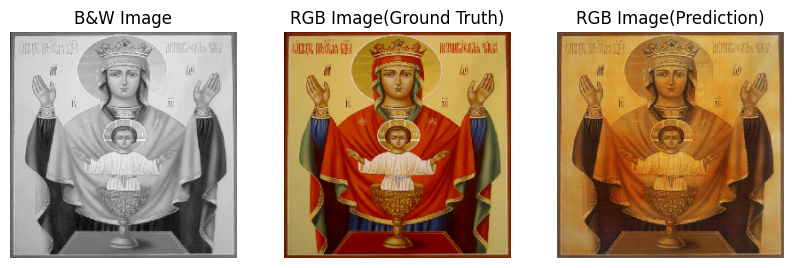

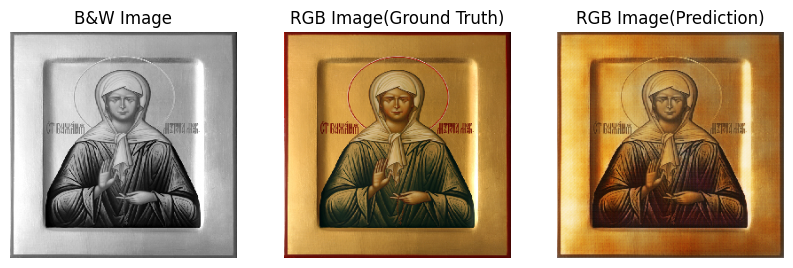

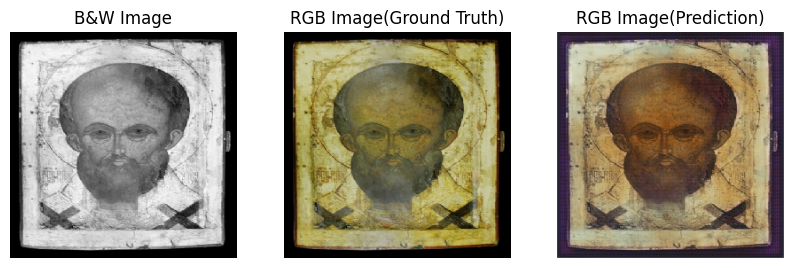

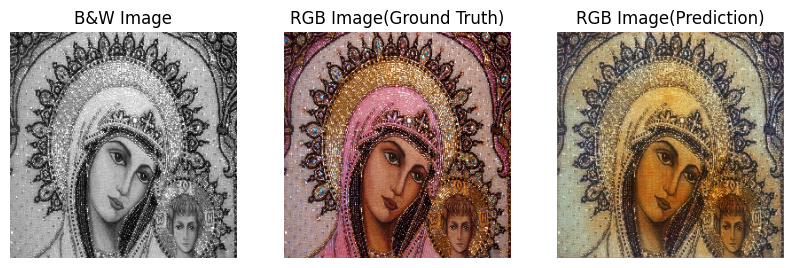

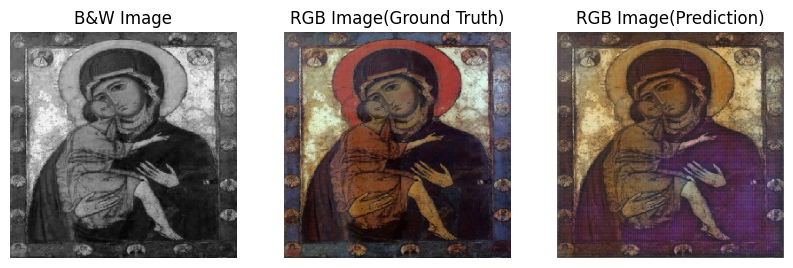

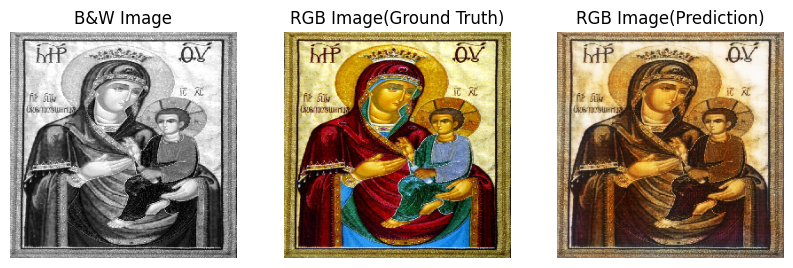

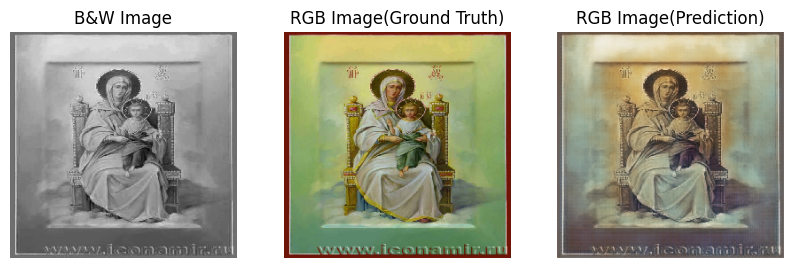

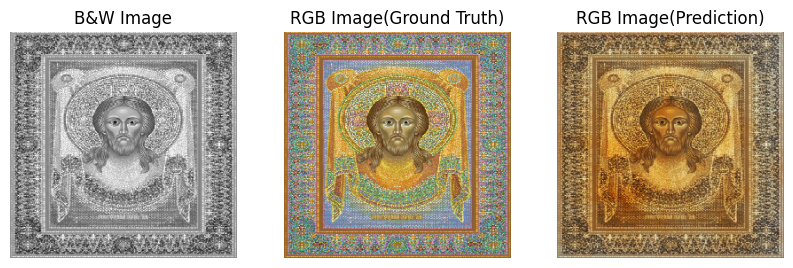

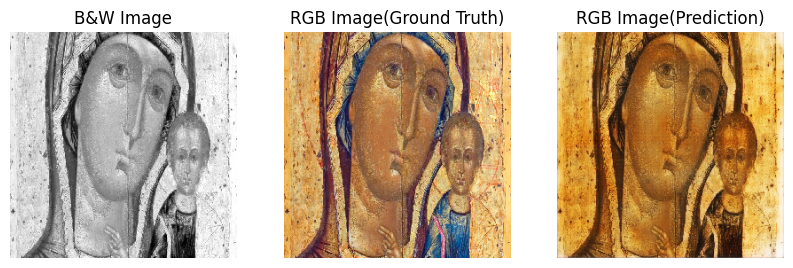

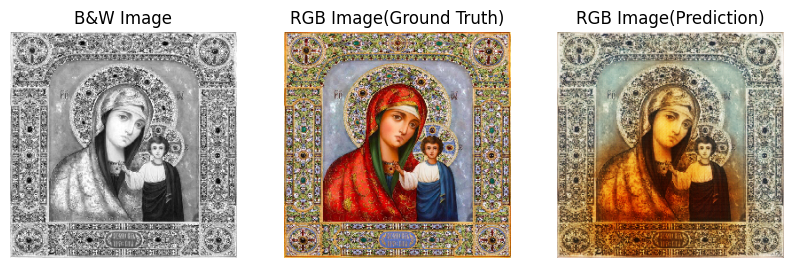

In [ ]:
with strategy.scope():
  predictionFunction(preTrained_model, no_of_samples = 10)